In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cáculo de coeficientes de fugasidad

Para el caso de un gas ideal, se tiene que:

$$\hat{f}_k=y_kP$$

La temperatura es de $50$

In [2]:
df=pd.read_csv("Datos11.24.csv",sep=";",decimal=",")

In [3]:
df["f1"]=df.y1*df.P
df["f2"]=(1-df.y1)*df.P
df["f1/x1"]=df.f1/df.x1
df["f2/x2"]=df.f2/(1-df.x1)

In [4]:
p1sat=df.P[10]
p2sat=df.P[0]

In [5]:
df["LR1"]=df.x1*p1sat
df["LR2"]=(1-df.x1)*p2sat

In [6]:
df

P     x1     y1        f1        f2      f1/x1      f2/x2       LR1  \
0   69.38  0.000  0.000   0.00000  69.38000        NaN  69.380000   0.00000   
1   66.11  0.104  0.066   4.36326  61.74674  41.954423  68.913772   8.50200   
2   63.07  0.198  0.153   9.64971  53.42029  48.735909  66.608840  16.18650   
3   61.25  0.298  0.269  16.47625  44.77375  55.289430  63.780271  24.36150   
4   60.60  0.401  0.414  25.08840  35.51160  62.564589  59.284808  32.78175   
5   62.01  0.502  0.562  34.84962  27.16038  69.421554  54.538916  41.03850   
6   64.53  0.591  0.676  43.62228  20.90772  73.810964  51.119120  48.31425   
7   68.29  0.695  0.793  54.15397  14.13603  77.919381  46.347639  56.81625   
8   72.75  0.797  0.879  63.94725   8.80275  80.234944  43.363300  65.15475   
9   77.13  0.895  0.946  72.96498   4.16502  81.525117  39.666857  73.16625   
10  81.75  1.000  1.000  81.75000   0.00000  81.750000        NaN  81.75000   

         LR2  
0   69.38000  
1   62.16448  
2   55.64276  
3   48.70476  
4   41.55862  
5   34.55124  
6   28.37642  
7   21.16090  
8   14.08414  
9    7.28490  
10   0.00000

## Gráfica de $\hat{f}_k$ comparado con Regla de Lewis/Randall

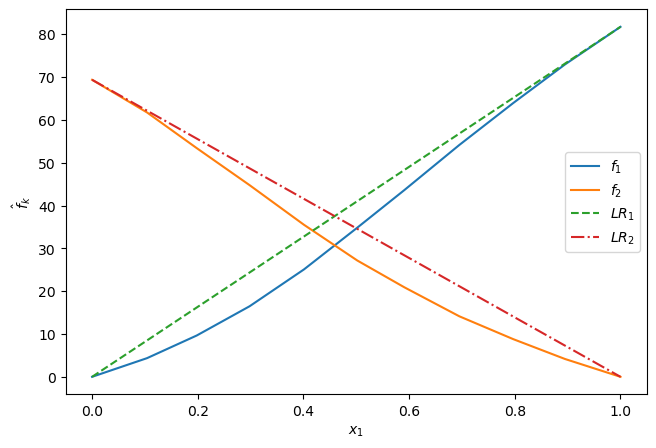

In [7]:
plt.figure(figsize=(7.5,5))
plt.plot(df.x1,df.f1)
plt.plot(df.x1,df.f2)
plt.plot(df.x1,df.LR1,"--")
plt.plot(df.x1,df.LR2,"-.")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$\hat{f}_k$")
plt.legend([r"$f_1$",r"$f_2$",r"$LR_1$",r"$LR_2$"])
plt.show()

## Constantes de la Ley de Henry

De la ecuación 12.47 del libro se tiene que:

$$\lim_{x_i\to 0}\frac{\hat{f}_i}{x_i}=k_i$$

In [8]:
k1=df["f1/x1"][1]
k2=df["f2/x2"][9]

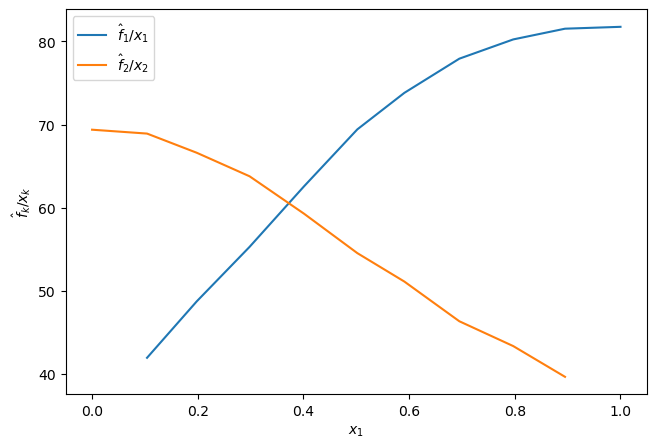

In [9]:
plt.figure(figsize=(7.5,5))
plt.plot(df.x1,df["f1/x1"])
plt.plot(df.x1,df["f2/x2"])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$\hat{f}_k/x_k$")
plt.legend([r"$\hat{f}_1/x_1$",r"$\hat{f}_2/x_2$"])
plt.show()

Se toma como estimador de los $k_i$ el valor de $f_i/x_i$ más cercano para $x_i\to 0$.

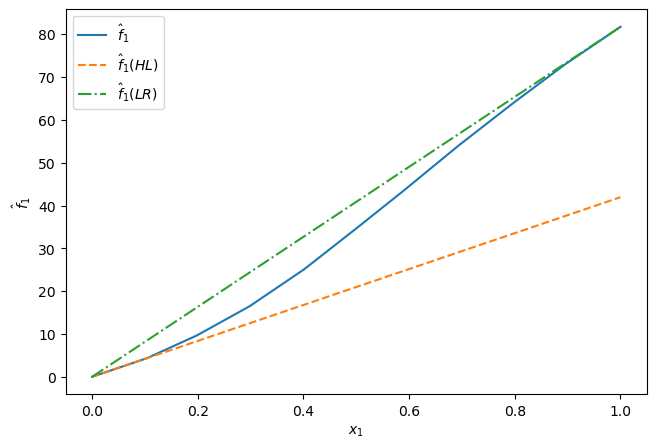

In [10]:
plt.figure(figsize=(7.5,5))
plt.plot(df.x1,df["f1"])
plt.plot(df.x1,k1*df.x1,"--")
plt.plot(df.x1,df.LR1,"-.")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$\hat{f}_1$")
plt.legend([r"$\hat{f}_1$",r"$\hat{f}_1(HL)$",r"$\hat{f}_1(LR)$"])
plt.show()

## El valor de $y_k^\infty$

Se tiene que:

$$k_k\approx y_k^\infty P_k^\mathrm{sat}$$

Cuando $f_i$ es la fugasidad de la sustancia pura, el caso ideal, entonces.

In [11]:
yinfty1=k1/df.P[10]
yinfty2=k2/df.P[0]

In [12]:
yinfty1,yinfty2

(0.5132039520112915, 0.5717333113700949)

## Utilizando ecuación del Virial

Para ejecutar este procedimiento, se tiene que:

$$\hat{f}_i=y_i\hat{\varphi}_iP$$

Y que:

$$\ln{\hat{\varphi}_k}=\frac{P}{RT}\left[B_{kk}+\frac{1}{2}\sum_i\sum_jy_iy_j\left(2\delta_{ik}-\delta_{ij}\right)\right]$$

Donde:

$$\delta_{ij}=2B_{ij}-B_{ii}-B_{jj}$$

Sabiendo que $B_{11}=-1.425$, $B_{22}=-1.030$ y $B_{12}=-785\,\mathrm{cm}^3/\mathrm{mol}$

In [13]:
delta12=delta21=2*-785/100**3--1.425/100**3--1.030/100**3

In [14]:
delta=np.array([0,delta12,0])
B=np.array([-1.425,785,-1.030])/100**3

In [15]:
c = pd.DataFrame(data=[B, delta]).T
c.columns=["B","delta"]

In [16]:
c

B     delta
0 -0.000001  0.000000
1  0.000785 -0.001568
2 -0.000001  0.000000

Se realiza el cálculo de los $\ln{\hat{\varphi}_k}$

In [17]:
df["lnPhi1"]=df.P*(c.B[0]+(df.y1*df.y1+df.y1*(1-df.y1)*(2*c.delta[0]-c.delta[1])+(1-df.y1)*df.y1*(2*c.delta[1]-c.delta[1])+(1-df.y1)*(1-df.y1)*(2*c.delta[1]-c.delta[2]))/2)/((50+273.15)*8.314)

In [18]:
df["lnPhi2"]=df.P*(c.B[2]+(df.y1*df.y1*(2*c.delta[1]-c.delta[0])+df.y1*(1-df.y1)*(2*c.delta[1]-c.delta[1])+(1-df.y1)*(1-df.y1)*(2*c.delta[2]-c.delta[2]))/2)/((50+273.15)*8.314)

Se calculan los $\hat{\varphi}_k$

In [19]:
df["Phi1"]=np.exp(df.lnPhi1)
df["Phi2"]=np.exp(df.lnPhi2)

Se calculan los $\hat{f}_k$

In [20]:
df["f1_V"]=df.y1*df.Phi1*df.P
df["f2_V"]=(1-df.y1)*df.Phi2*df.P

In [21]:
df

P     x1     y1        f1        f2      f1/x1      f2/x2       LR1  \
0   69.38  0.000  0.000   0.00000  69.38000        NaN  69.380000   0.00000   
1   66.11  0.104  0.066   4.36326  61.74674  41.954423  68.913772   8.50200   
2   63.07  0.198  0.153   9.64971  53.42029  48.735909  66.608840  16.18650   
3   61.25  0.298  0.269  16.47625  44.77375  55.289430  63.780271  24.36150   
4   60.60  0.401  0.414  25.08840  35.51160  62.564589  59.284808  32.78175   
5   62.01  0.502  0.562  34.84962  27.16038  69.421554  54.538916  41.03850   
6   64.53  0.591  0.676  43.62228  20.90772  73.810964  51.119120  48.31425   
7   68.29  0.695  0.793  54.15397  14.13603  77.919381  46.347639  56.81625   
8   72.75  0.797  0.879  63.94725   8.80275  80.234944  43.363300  65.15475   
9   77.13  0.895  0.946  72.96498   4.16502  81.525117  39.666857  73.16625   
10  81.75  1.000  1.000  81.75000   0.00000  81.750000        NaN  81.75000   

         LR2    lnPhi1        lnPhi2      Phi1      Phi2       f1_V       f2_V  
0   69.38000 -0.000041 -2.659851e-08  0.999959  1.000000   0.000000  69.379998  
1   62.16448  0.000020 -1.382233e-06  1.000020  0.999999   4.363347  61.746655  
2   55.64276  0.000248 -3.269962e-06  1.000248  0.999997   9.652107  53.420115  
3   48.70476  0.000806 -6.123004e-06  1.000806  0.999994  16.489530  44.773476  
4   41.55862  0.001921 -1.037223e-05  1.001923  0.999990  25.136636  35.511232  
5   34.55124  0.003638 -1.590393e-05  1.003645  0.999984  34.976633  27.159948  
6   28.37642  0.005484 -2.135314e-05  1.005499  0.999979  43.862161  20.907274  
7   21.16090  0.007990 -2.835226e-05  1.008022  0.999972  54.588411  14.135629  
8   14.08414  0.010460 -3.508083e-05  1.010515  0.999965  64.619660   8.802441  
9    7.28490  0.012846 -4.145177e-05  1.012928  0.999959  73.908307   4.164847  
10   0.00000  0.015214 -4.772862e-05  1.015330  0.999952  83.003251   0.000000

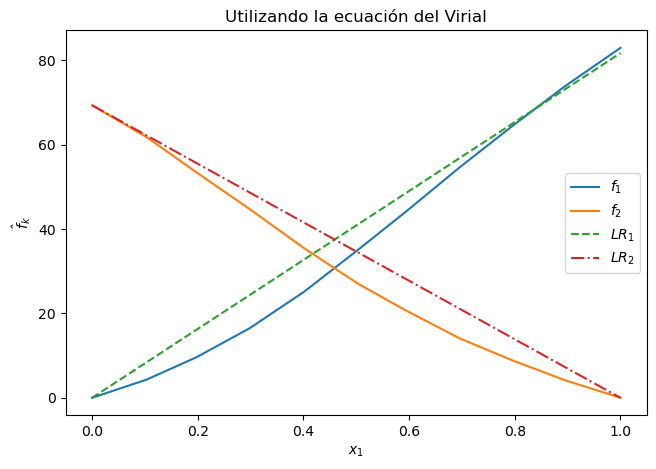

In [22]:
plt.figure(figsize=(7.5,5))
plt.plot(df.x1,df.f1_V)
plt.plot(df.x1,df.f2_V)
plt.plot(df.x1,df.LR1,"--")
plt.plot(df.x1,df.LR2,"-.")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$\hat{f}_k$")
plt.legend([r"$f_1$",r"$f_2$",r"$LR_1$",r"$LR_2$"])
plt.title("Utilizando la ecuación del Virial")
plt.show()

In [23]:
df["f1_V/x1"]=df.f1_V/df.x1
df["f2_V/x2"]=df.f2_V/(1-df.x1)

In [24]:
df

P     x1     y1        f1        f2      f1/x1      f2/x2       LR1  \
0   69.38  0.000  0.000   0.00000  69.38000        NaN  69.380000   0.00000   
1   66.11  0.104  0.066   4.36326  61.74674  41.954423  68.913772   8.50200   
2   63.07  0.198  0.153   9.64971  53.42029  48.735909  66.608840  16.18650   
3   61.25  0.298  0.269  16.47625  44.77375  55.289430  63.780271  24.36150   
4   60.60  0.401  0.414  25.08840  35.51160  62.564589  59.284808  32.78175   
5   62.01  0.502  0.562  34.84962  27.16038  69.421554  54.538916  41.03850   
6   64.53  0.591  0.676  43.62228  20.90772  73.810964  51.119120  48.31425   
7   68.29  0.695  0.793  54.15397  14.13603  77.919381  46.347639  56.81625   
8   72.75  0.797  0.879  63.94725   8.80275  80.234944  43.363300  65.15475   
9   77.13  0.895  0.946  72.96498   4.16502  81.525117  39.666857  73.16625   
10  81.75  1.000  1.000  81.75000   0.00000  81.750000        NaN  81.75000   

         LR2    lnPhi1        lnPhi2      Phi1      Phi2       f1_V  \
0   69.38000 -0.000041 -2.659851e-08  0.999959  1.000000   0.000000   
1   62.16448  0.000020 -1.382233e-06  1.000020  0.999999   4.363347   
2   55.64276  0.000248 -3.269962e-06  1.000248  0.999997   9.652107   
3   48.70476  0.000806 -6.123004e-06  1.000806  0.999994  16.489530   
4   41.55862  0.001921 -1.037223e-05  1.001923  0.999990  25.136636   
5   34.55124  0.003638 -1.590393e-05  1.003645  0.999984  34.976633   
6   28.37642  0.005484 -2.135314e-05  1.005499  0.999979  43.862161   
7   21.16090  0.007990 -2.835226e-05  1.008022  0.999972  54.588411   
8   14.08414  0.010460 -3.508083e-05  1.010515  0.999965  64.619660   
9    7.28490  0.012846 -4.145177e-05  1.012928  0.999959  73.908307   
10   0.00000  0.015214 -4.772862e-05  1.015330  0.999952  83.003251   

         f2_V    f1_V/x1    f2_V/x2  
0   69.379998        NaN  69.379998  
1   61.746655  41.955258  68.913677  
2   53.420115  48.748013  66.608623  
3   44.773476  55.333994  63.779880  
4   35.511232  62.684879  59.284193  
5   27.159948  69.674567  54.538048  
6   20.907274  74.216854  51.118028  
7   14.135629  78.544477  46.346325  
8    8.802441  81.078620  43.361779  
9    4.164847  82.579114  39.665213  
10   0.000000  83.003251        NaN

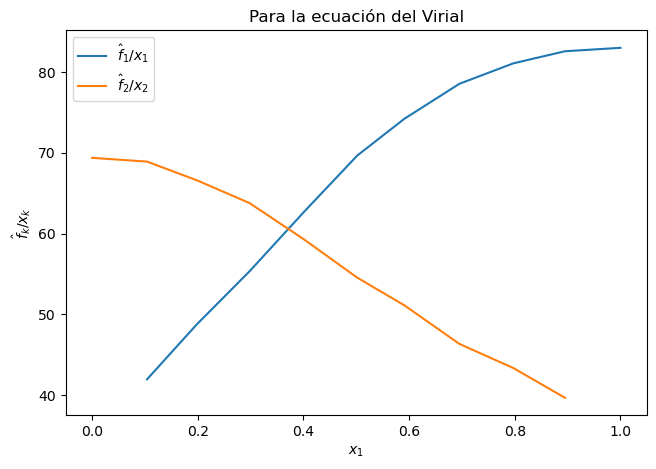

In [25]:
plt.figure(figsize=(7.5,5))
plt.plot(df.x1,df["f1_V/x1"])
plt.plot(df.x1,df["f2_V/x2"])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$\hat{f}_k/x_k$")
plt.legend([r"$\hat{f}_1/x_1$",r"$\hat{f}_2/x_2$"])
plt.title("Para la ecuación del Virial")
plt.show()

Recordando que:

$$\lim_{x_i\to 0}\frac{\hat{f}_i}{x_i}=k_i$$

Nuevamente, se toma el valor más cercano para $x_1\to 0$.

In [26]:
k1_V=df["f1_V/x1"][1]
k2_V=df["f2_V/x2"][9]

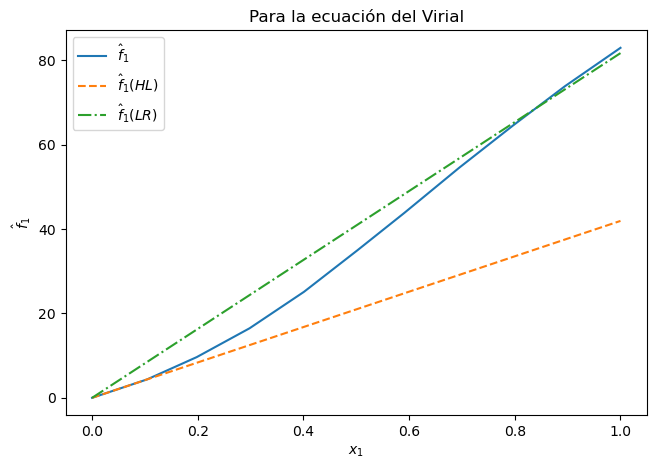

In [27]:
plt.figure(figsize=(7.5,5))
plt.plot(df.x1,df["f1_V"])
plt.plot(df.x1,k1_V*df.x1,"--")
plt.plot(df.x1,df.LR1,"-.")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$\hat{f}_1$")
plt.legend([r"$\hat{f}_1$",r"$\hat{f}_1(HL)$",r"$\hat{f}_1(LR)$"])
plt.title("Para la ecuación del Virial")
plt.show()

In [28]:
yinfty1_V=k1_V/df.P[10]
yinfty2_V=k2_V/df.P[0]

In [29]:
yinfty1_V,yinfty2_V

(0.513214169849023, 0.5717096125046486)

In [31]:
k1,k2,k1_V,k2_V

(41.954423076923085, 39.66685714285718, 41.95525838515763, 39.66521291557252)